In [17]:
import cv2
import numpy as np
import random
import pytesseract
from PIL import Image

global im
global low_canny
global high_canny
global trackbars
global imgsnames
global img_counter

low_canny = 231
high_canny = 89
trackbars = False

im = np.asarray(gray)
im_in = cv2.resize(im, dsize=(640, 480))
np.array(im_in, copy=True)

avg, sdv = cv2.meanStdDev(im_in)

if avg < 55 and sdv < 40:
    im_in = cv2.equalizeHist(im_in)
    im_in = cv2.GaussianBlur(im_in, (3, 3), 1)

im_in = cv2.GaussianBlur(im_in, (3, 3), 1)

im_canny = cv2.Canny(im_in, low_canny, high_canny, apertureSize=3)
im_canny_copy = np.array(im_canny, copy=True)

h, w = im_in.shape
im_out = np.zeros((h, w, 1), np.uint8)

totaleArea =  float(w*h)

contours = cv2.findContours(im_canny_copy, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for (i,c) in enumerate(contours):
    rect = cv2.boundingRect(c)
    area = (rect[2] * rect[3]) / totaleArea
    hPerc =  rect[3] / float(h)
    aspect = float(rect[2]) / rect[3]

    if area < 0.002 or area > 0.015 or hPerc < 0.07 or aspect >= 0.7:
        continue

    #print area
    color = (255, 255, 255)

    mask = np.zeros((h, w, 1), np.uint8)
    cv2.rectangle(mask, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), color, -1)
    avg, sdv = cv2.meanStdDev(im_in, mask=mask)

    print avg, sdv

    offset = -random.randint(10, 20) if i % 2 == 1 else rect[3] + random.randint(15, 25)

    cv2.rectangle(im_out, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), color, -1)
    # cv2.putText(im_out, '{:0.2f}'.format(sdv[0, 0]), (rect[0], rect[1] + offset), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    # cv2.drawContours(im_out, contours, i, color, -1)

mask = np.array(im_out, copy=True)
im_out = cv2.bitwise_and(im_in, im_out)
im_out = cv2.bitwise_not(im_out, mask=mask)
cv2.imwrite(r'test.jpg', im_out)

avg = cv2.mean(im_out, mask)
print avg

t, im_out = cv2.threshold(im_out, avg[0] + 10, 255, cv2.cv.CV_THRESH_BINARY)

cv2.imshow('canny', im_canny)
if not trackbars:
    cv2.createTrackbar('imgnames', 'canny', img_counter, 6, setImgsNames)
    cv2.createTrackbar('canny_low', 'canny', low_canny, 255, setLowCannyTrack)
    cv2.createTrackbar('canny_high', 'canny', high_canny, 255, setHighCannyTrack)
    trackbars = True

# im_out = cv2.morphologyEx(im_out, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.cv.CV_SHAPE_RECT, (3, 3)), iterations=1)

cv2.imshow('im', im_out)
cv2.imshow('out', im_in)


print pytesseract.image_to_string(Image.fromarray(im_out), config='-psm 7')

TypeError: points is not a numpy array, neither a scalar

In [10]:
from PIL import Image, ImageTransform, ImageFilter
img = Image.open("c:/tmp/tmp6sgmpo.png")
if hasattr(img, "width"):
    width, height = img.width, img.height
else:
    width, height = img.size
for x in range(width):
    for y in range(height):
        if img.getpixel((x, y)) < (100, 100, 100):
            img.putpixel((x, y), (255, 255, 255))
import numpy as np
print(np.mean(np.asarray(img)))
gray = img.convert('L')    

preprocess_image(np.asarray( img))

193.9752


TypeError: No matching signature found

In [11]:

def GetAverage(mat):
    
    n=len(mat)
    m= width(mat) 
    num = [0]*m
    for j in range(0,m): 
           for i in mat:
              num[j]=num[j]+i[j]           
           num[j]=num[j]/n   
    return num

def width(lst):
    i=0
    for j in lst[0]:
       i=i+1
    return i

def GetVar(average,mat):    
    ListMat=[]
    for i in mat:    
        ListMat.append(list(map(lambda x: x[0]-x[1], zip(average, i))))
   
    n=len(ListMat)
    m= width(ListMat) 
    num = [0]*m
    for j in range(0,m): 
        for i in ListMat:
                  num[j]=num[j]+(i[j]*i[j])       
        num[j]=num[j]/n   
    return num 

def DenoisMat(mat):
    average=GetAverage(mat)
    variance=GetVar(average,mat)
    section=list(map(lambda x: x[0]+x[1], zip(average, variance)))    
    
    n=len(mat)
    m= width(mat) 
    num = [0]*m
    denoisMat=[]    
    for i in mat:
        for j in range(0,m):
               if i[j]>section[j]:
                     i[j]=section[j]
        denoisMat.append(i)  
    return denoisMat                
                        
def AutoNorm(mat):   
    n=len(mat)
    m= width(mat)     
    MinNum=[9999999999]*m
    MaxNum = [0]*m    
    for i in mat:
        for j in range(0,m):
            if i[j]>MaxNum[j]:
                MaxNum[j]=i[j]
      
    for p in mat:     
        for q in range(0,m):
            if p[q]<=MinNum[q]:
                    MinNum[q]=p[q]  
                          
    section=list(map(lambda x: x[0]-x[1], zip(MaxNum, MinNum)))
    print section
    NormMat=[]
     
    for k in mat:     
             
          distance=list(map(lambda x: x[0]-x[1], zip(k, MinNum)))
          value=list(map(lambda x: x[0]/x[1], zip(distance,section)))
          NormMat.append(value)           
    return NormMat        
    

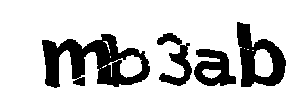

In [36]:
two = gray.point(lambda p: 0 if 68 < p < 90 else 256)
min_res = two.filter(ImageFilter.MinFilter)
med_res = min_res.filter(ImageFilter.MedianFilter)
min_res

In [43]:
import pytesseract
print(pytesseract.image_to_string(med_res,lang='eng'))
gray.point?

ntb3ab
